In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore') #To ignore the warnings

In [ ]:
from sklearn.datasets import fetch_openml #importing dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  #data splitting
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA #Importing PCA for Dimensionality Reduction

from scipy.stats import multivariate_normal

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(np.int16)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
data = X
data['classes'] = y
print(data.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  classes  
0         0        

In [ ]:
print(data.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'classes'],
      dtype='object', length=785)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to classes
dtypes: int16(1), int64(784)
memory usage: 418.8 MB
None


In [ ]:
print(data.shape)

(70000, 785)


In [ ]:
print(data.isnull().sum().sum())

0


In [ ]:
X_train = X_train/255
X_test = X_test/255
#PCA
pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

QDA With Sklearn

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

QDA without PCA

In [ ]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5226

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.97      0.44      1343
           1       0.88      0.95      0.91      1600
           2       0.87      0.21      0.33      1380
           3       0.64      0.26      0.37      1433
           4       0.84      0.07      0.13      1295
           5       0.92      0.08      0.14      1273
           6       0.77      0.94      0.85      1396
           7       0.92      0.29      0.45      1503
           8       0.48      0.40      0.44      1357
           9       0.42      0.95      0.59      1420

    accuracy                           0.52     14000
   macro avg       0.70      0.51      0.46     14000
weighted avg       0.70      0.52      0.48     14000



QDA with PCA

In [ ]:
qda = QDA()
qda.fit(X_train_pca, y_train)
y_pred = qda.predict(X_test_pca)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9594

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.99      0.96      0.98      1600
           2       0.93      0.98      0.95      1380
           3       0.95      0.94      0.95      1433
           4       0.97      0.98      0.97      1295
           5       0.96      0.95      0.96      1273
           6       0.99      0.97      0.98      1396
           7       0.98      0.94      0.96      1503
           8       0.89      0.96      0.92      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



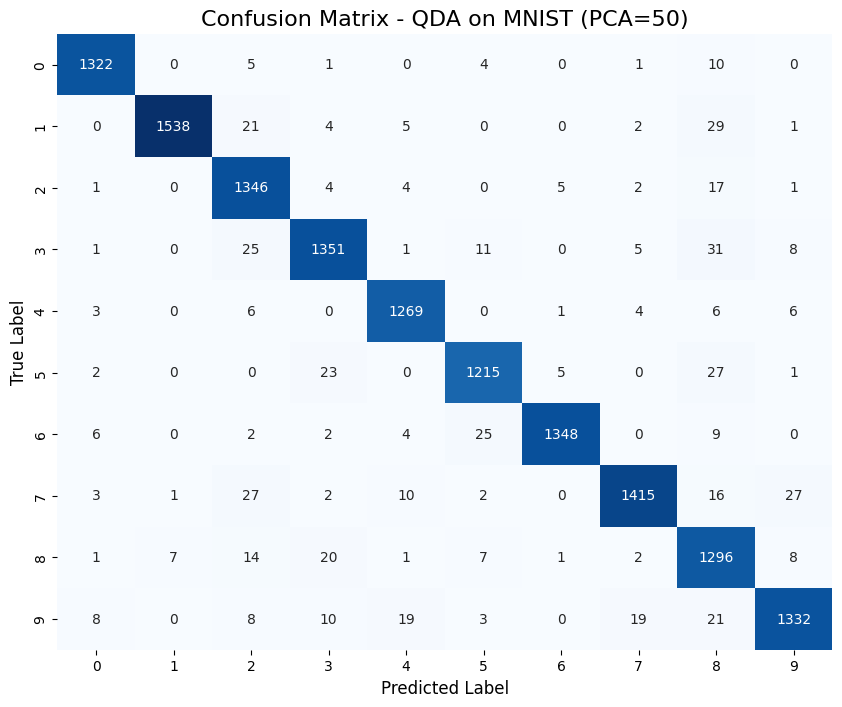

In [ ]:
#estimating and visualising the confusion matrix for QDA
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - QDA on MNIST (PCA=50)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()


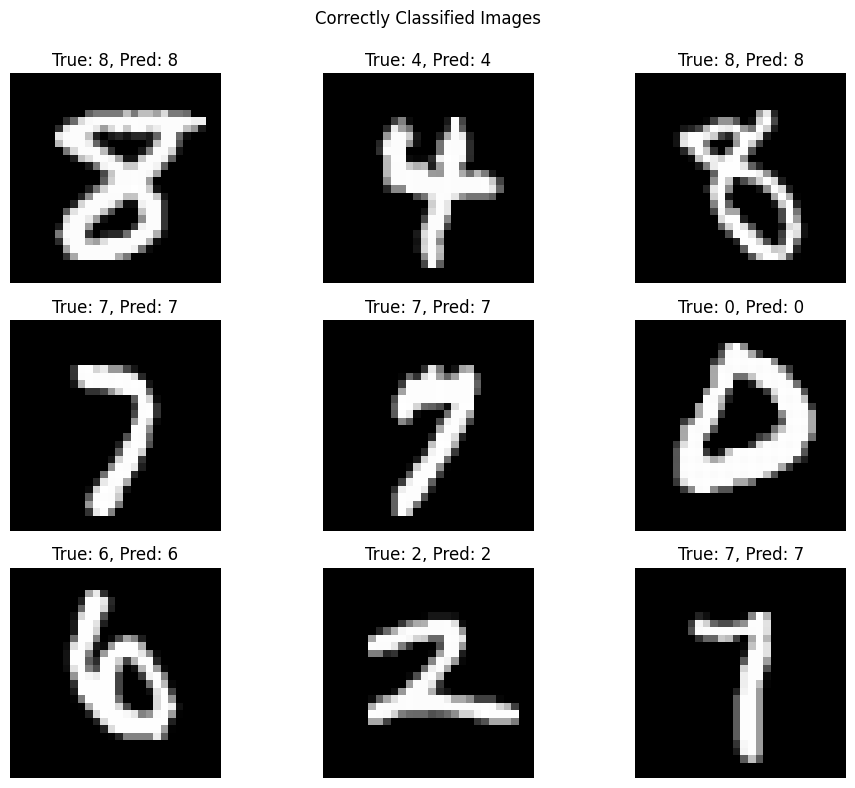

In [ ]:
#Correctly predicted samples
correct = np.array(y_pred) == np.array(y_test)
plt.figure(figsize=(10, 8))
for index, (image, true_label, pred_label) in enumerate(zip(X_test[correct].values, y_test[correct], y_pred[correct])):
    if index == 9:
        break
    image_reshaped = image.reshape(28, 28)
    plt.subplot(3, 3, index + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')

plt.suptitle('Correctly Classified Images')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

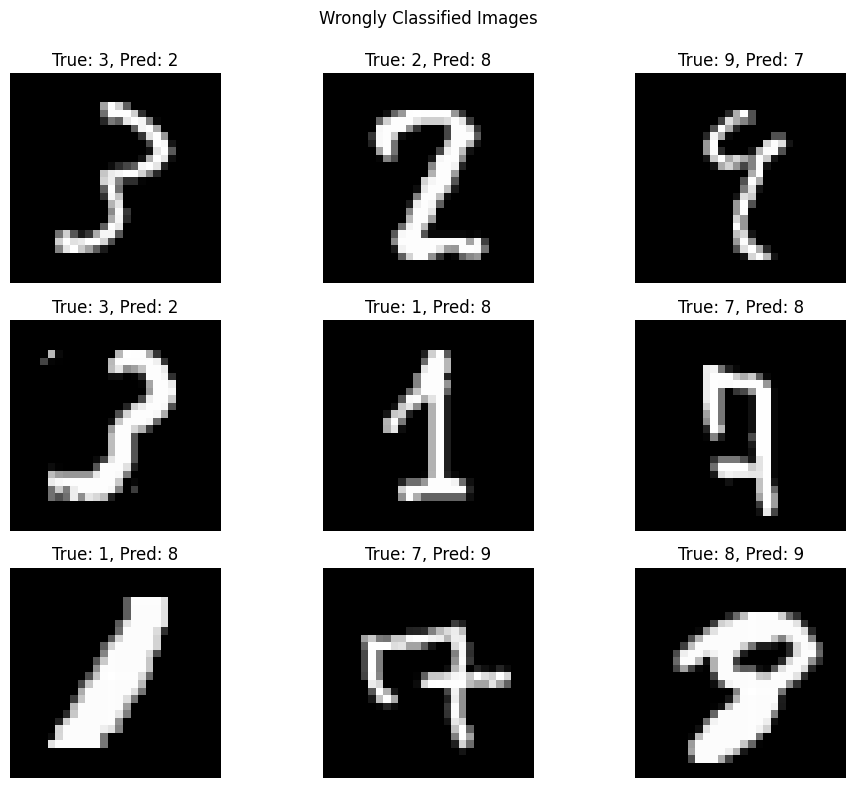

In [ ]:
#Incorrectly predicted samples
incorrect = np.array(y_pred) != np.array(y_test)
plt.figure(figsize=(10, 8))
for index, (image, true_label, pred_label) in enumerate(zip(X_test[incorrect].values, y_test[incorrect], y_pred[incorrect])):
    if index == 9:
        break
    image_reshaped = image.reshape(28, 28)
    plt.subplot(3, 3, index + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')

plt.suptitle('Wrongly Classified Images')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:

class Metrics:
    def __init__(self, test_y, pred):
        self.test_y = test_y
        self.pred = pred

    def accuracy(self):
        test_y_int = self.test_y.astype(int)
        self.pred = np.array(self.pred).ravel()
        acc = np.sum(self.pred == test_y_int)/test_y_int.shape[0]
        return acc

    def confusion_matrix(self):
        pred = self.pred
        self.test_y = self.test_y.astype(int)
        conf_matrix  = np.zeros((10, 10))
        for t, p in zip(self.test_y, pred):
            conf_matrix[t, p] += 1
        return conf_matrix

    def precision(self):
        precisions = np.array([])
        conf_matrix = self.confusion_matrix()
        for i in range(10):
            if np.sum(conf_matrix[:, i]) != 0:
                precision = conf_matrix[i, i]/np.sum(conf_matrix[:, i])
                precisions = np.append(precisions, precision)
            else:
                precisions = np.append(precisions, 0)

        precision= np.sum(precisions)/len(precisions)
        return precision

    def recall(self):
        recalls = np.array([])
        conf_matrix = self.confusion_matrix()
        for i in range(10):
            if np.sum(conf_matrix[i, :]) != 0:
                recall = conf_matrix[i, i]/np.sum(conf_matrix[i, :])
                recalls = np.append(recalls, recall)
            else:
                recalls = np.append(recalls, 0)
        recall = np.sum(recalls)/ len(recalls)
        return recall

    def f1_score(self):
        recall = self.recall()
        precison = self.precision()
        f1_score = 2*recall*precison/(precison+recall)
        return f1_score
    def Report(self):
      report = pd.DataFrame({"accuracy": [self.accuracy()],
                             'recall': [self.recall()],
                             'precision': [self.precision()],
                             'F1 Score': [self.f1_score()]},
                             index=['Metrics'])
      return report

QDA without skelarn


In [ ]:

class QDA:
    def __init__(self):
        self.means = None
        self.probs = None
        self.covariances = None
        self.Nk = None
        self.pred = None

    def fit(self, train_X, train_y):
        self.Nk = np.zeros(10)
        self.means = np.zeros((10, train_X.shape[1]))
        self.covariances = np.zeros((10, train_X.shape[1], train_X.shape[1]))
        self.probs = np.zeros(10)

        #we can use 10 in loop as we know the number of classes but we could use(len(np.unigue(self.train_y)) instead
        for i in range(10):
            n = train_X[(train_y == i)].shape[0]
            self.Nk[i] = n

        print("Class counts calculated")

        #we could also use np.mean to compute the mean
        for i in range(10):
            class_k = train_X[(train_y == i)]
            mean = (1 / self.Nk[i]) * np.sum(class_k, axis = 0)
            self.means[i] = mean
        print("Class means calculated")

        #we could also use np.cov to compute the covariance
        for i in range(10):
            cov = 1 / (self.Nk[i] - 10) * (train_X[(train_y == i)] - self.means[i]).T@(train_X[(train_y == i)] - self.means[i])
            self.covariances[i] = cov
        print('Covariances calculated')

        for i in range(10):
            self.probs[i] = self.Nk[i]/train_y.shape[0]
        print("Probs calculated")

    def predict(self, test_X):
        self.means = self.means[:, np.newaxis, :]
        test_X = test_X[np.newaxis, :, :]
        sub = test_X - self.means
        det_log = np.array([np.log(np.linalg.det(self.covariances[i])+0.000001) for i in range(10)])
        det_log = np.reshape(det_log, (-1,1))
        prob_log = np.reshape(np.log(self.probs), (-1, 1))
        dot_prod = sub@np.linalg.pinv(self.covariances)@np.transpose(sub, (0, 2, 1)) # the shape will be (10 X m X m)  where m is the number of samples and we need to take the diagonal elemnts of (m X m) matrix for each class as the diagonal elemnts are the values of (x-mean)@cov@(x-mean)
        diag = np.linalg.diagonal(dot_prod)
        self.pred = (-1/2)*det_log-1/2*diag + prob_log
        self.pred = np.argmax(self.pred, axis = 0)
        return self.pred


X_test_pca_sub = X_test_pca[:10000,:]
y_test_sub = y_test[:10000]


In [ ]:
qda = QDA()

In [ ]:
qda.fit(X_train_pca, y_train)

Class counts calculated
Class means calculated
Covariances calculated
Probs calculated


In [ ]:
pred = qda.predict(X_test_pca_sub)

In [ ]:
metrics = Metrics(y_test_sub, pred)
metrics.Report()

,accuracy,recall,precision,F1 Score
Metrics,0.9342,0.93681,0.941853,0.939325


Random Forest with sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_pca, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 150}
Best cross-validated accuracy: 0.9516


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_pca)

In [ ]:
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.9543571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.93      0.94      0.93      1433
           4       0.94      0.96      0.95      1295
           5       0.95      0.95      0.95      1273
           6       0.97      0.98      0.97      1396
           7       0.96      0.96      0.96      1503
           8       0.95      0.91      0.93      1357
           9       0.95      0.93      0.94      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



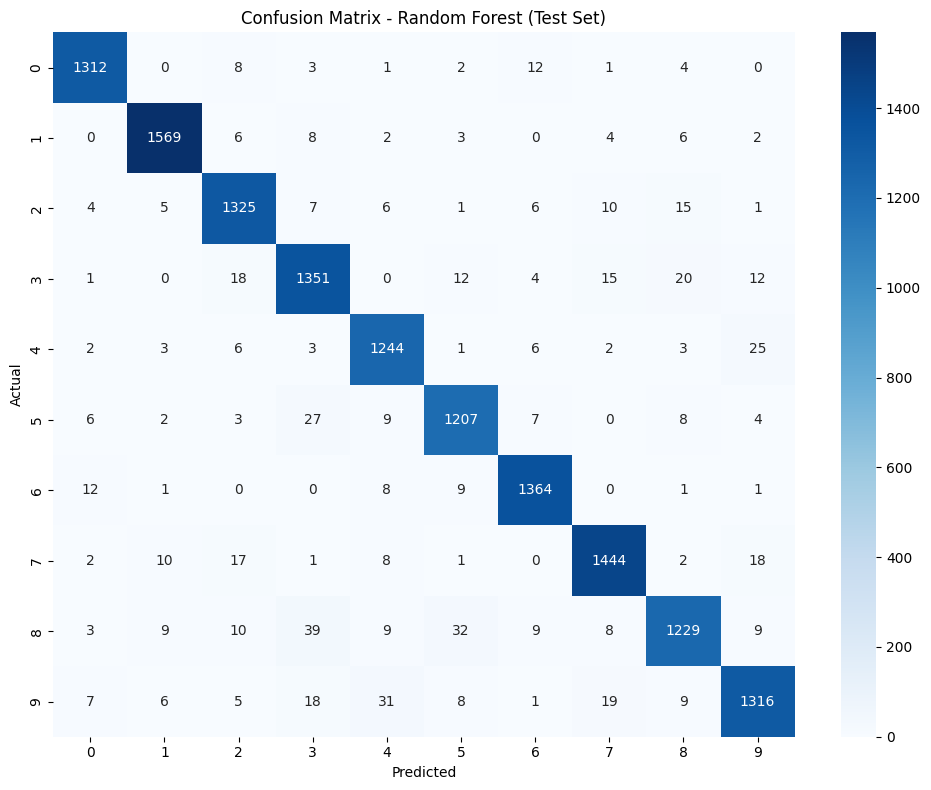

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

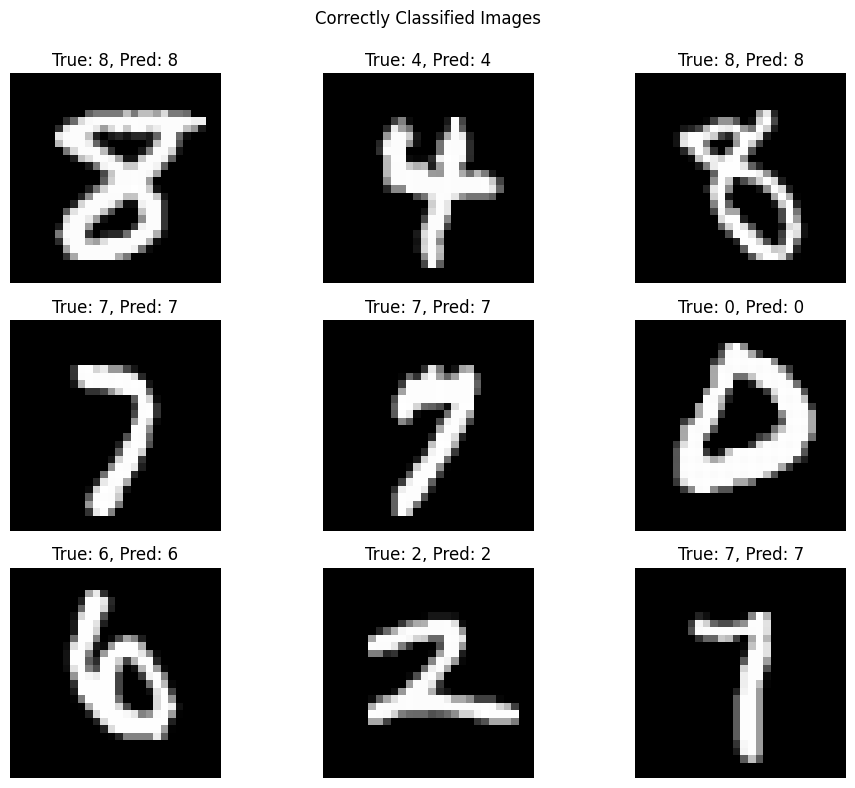

In [ ]:
#Correctly predicted samples
correct = np.array(y_pred) == np.array(y_test)
plt.figure(figsize=(10, 8))
for index, (image, true_label, pred_label) in enumerate(zip(X_test[correct].values, y_test[correct], y_pred[correct])):
    if index == 9:
        break
    image_reshaped = image.reshape(28, 28)
    plt.subplot(3, 3, index + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')

plt.suptitle('Correctly Classified Images')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

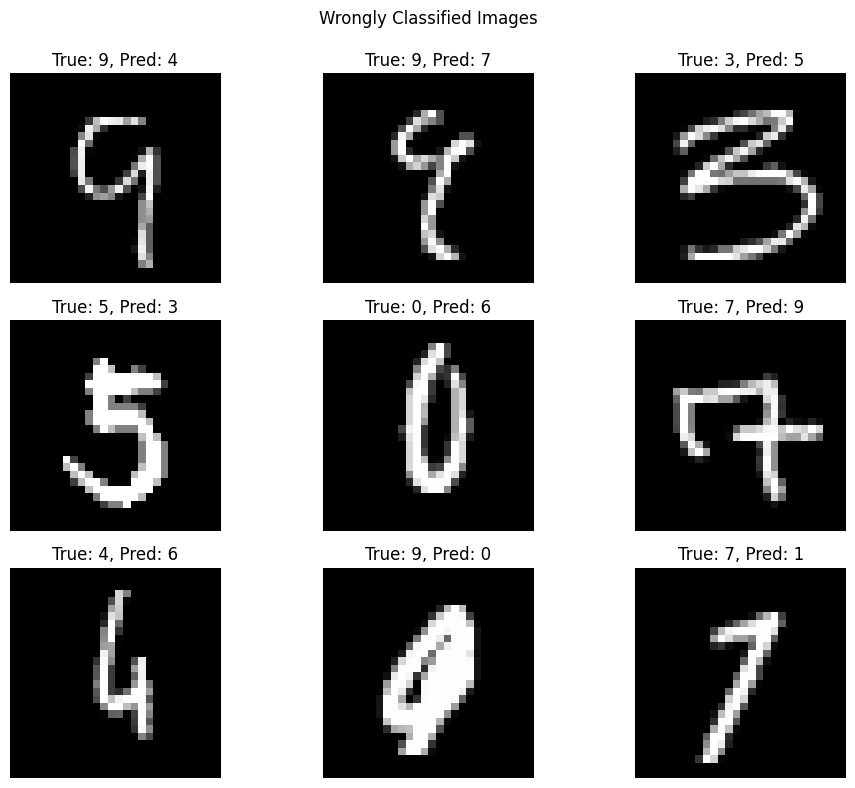

In [ ]:
#Incorrectly predicted samples
incorrect = np.array(y_pred) != np.array(y_test)
plt.figure(figsize=(10, 8))
for index, (image, true_label, pred_label) in enumerate(zip(X_test[incorrect].values, y_test[incorrect], y_pred[incorrect])):
    if index == 9:
        break
    image_reshaped = image.reshape(28, 28)
    plt.subplot(3, 3, index + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')

plt.suptitle('Wrongly Classified Images')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**Random Forest without sklearn**

In [ ]:
class Random_Forest:
    def __init__(self, n_models=100, n_features=28, max_depth=10):
        self.n_models = n_models
        self.n_features = n_features
        self.max_depth = max_depth
        self.models = []

    def fit(self, train_X, train_y):
        for _ in range(self.n_models):
            # Make train data set for each decision tree(the samples can be repeated)
            samples = np.random.choice(range(train_X.shape[0]), size=train_X.shape[0], replace=True)
            X_sample = train_X[samples, :]
            y_sample = train_y[samples]

            #Take features for each random forest to be trained(featuers must be unique in each model)
            features = np.random.choice(range(train_X.shape[1]), size=self.n_features, replace=False)
            X_sample = X_sample[:, features]

            tree = self.build_tree(X_sample, y_sample)
            self.models.append((tree, features))

    def best_split(self, X, y):

        best_gini = float("inf")
        best_split = None
        best_left_y = None
        best_right_y = None
        best_left_X = None
        best_right_X = None

        # Iterate over each feature (it must be computed for each feature and each possible treshold (here tresholds are choosed from the feature values))
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            # Iterate over possible threshold values to compute the best treshold value for each feature
            for t in thresholds:
                left_mask = X[:, feature_index] <= t
                right_mask = X[:, feature_index] > t
                left_X = X[left_mask]
                right_X = X[right_mask]
                left_y = y[left_mask]
                right_y = y[right_mask]

                # Skip splits that result in empty subsets
                if len(left_X) == 0 or len(right_X) == 0:
                    continue

                # Calculate Gini impurity ()
                gini_left = self.gini_impurity(left_y)
                gini_right = self.gini_impurity(right_y)

                # Comute weighted gini impurity
                gini = (len(left_X) / len(X)) * gini_left + (len(right_X) / len(X)) * gini_right

                #update gini if it is better, and define best_split which includes best treshold and feature to use for splitting
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_index, t)
                    best_left_X = left_X
                    best_right_X = right_X
                    best_left_y = left_y
                    best_right_y = right_y

        return best_split, best_left_X, best_right_X, best_left_y, best_right_y

    def gini_impurity(self, y):
        classes, counts = np.unique(y, return_counts=True)
        prob = counts / len(y)
        return 1 - np.sum(prob ** 2)

    def build_tree(self, X, y, depth=0):
        # Stop if pure or max depth reached (return majority class)
        if len(np.unique(y)) == 1 or depth >= self.max_depth:
            values, counts = np.unique(y, return_counts=True)
            return values[np.argmax(counts)]

        # Find the best split
        best_split, left_X, right_X, left_y, right_y = self.best_split(X, y)

        # Return majority class if tehre is not a good split
        if best_split is None:
            values, counts = np.unique(y, return_counts=True)
            return values[np.argmax(counts)]

        feature_index, threshold = best_split

        left_tree = self.build_tree(left_X, left_y, depth + 1)
        right_tree = self.build_tree(right_X, right_y, depth + 1)

        return {'feature_index': feature_index, 'threshold': threshold, 'left': left_tree, 'right': right_tree}


    def predict_tree(self, tree, X):
        if isinstance(tree, dict):
            feature_index = tree['feature_index']
            threshold = tree['threshold']
            if X[feature_index] <= threshold:
                return self.predict_tree(tree['left'], X)
            else:
                return self.predict_tree(tree['right'], X)
        else:
            return tree

    def predict(self, test_X):
        all_preds = []
        for x in test_X:
            preds = [self.predict_tree(tree, x[features]) for tree, features in self.models]
            all_preds.append(np.bincount(preds).argmax())
        return np.array(all_preds)


In [ ]:
#this is done for running the code faster
train_X_sub1 = X_train_pca[:1000, :]
train_y_sub1 = y_train[:1000]
test_X_sub1 = X_test_pca[:1000, :]
test_y_sub1 = y_test[:1000]
train_y_sub1 = train_y_sub1.reset_index(drop=True)
test_y_sub1 = train_y_sub1.reset_index(drop=True)


In [ ]:
#this code takes too long to run even on 1000 samples took around 1 hour
rf = Random_Forest()
rf.fit(train_X_sub1, train_y_sub1)

In [ ]:
pred = rf.predict(X_test_pca)

In [ ]:
metrics = Metrics(y_test, pred)
metrics.Report()
#this results are recieved from only 1000 train data

,accuracy,recall,precision,F1 Score
Metrics,0.858071,0.85486,0.859896,0.857371


SVM with sklearn

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

svm_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
y_pred = svm_model.predict(X_test_pca)

In [ ]:
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.9855
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.98      0.99      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.99      0.98      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.98      0.97      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



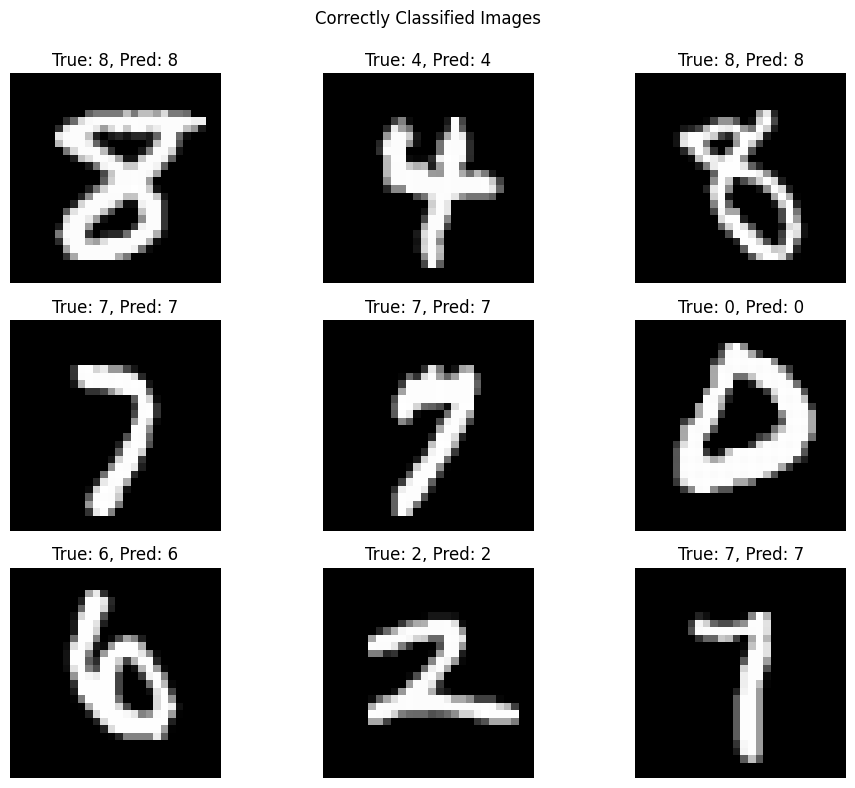

In [ ]:
#Correctly predicted samples
correct = np.array(y_pred) == np.array(y_test)
plt.figure(figsize=(10, 8))
for index, (image, true_label, pred_label) in enumerate(zip(X_test[correct].values, y_test[correct], y_pred[correct])):
    if index == 9:
        break
    image_reshaped = image.reshape(28, 28)
    plt.subplot(3, 3, index + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')

plt.suptitle('Correctly Classified Images')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

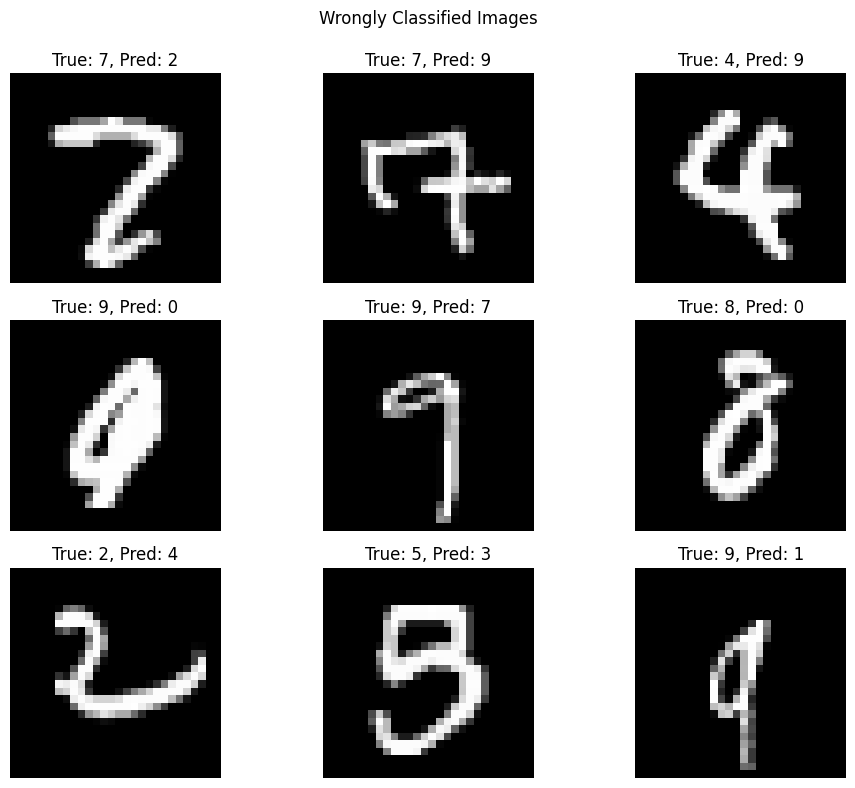

In [ ]:
#Incorrectly predicted samples
incorrect = np.array(y_pred) != np.array(y_test)
plt.figure(figsize=(10, 8))
for index, (image, true_label, pred_label) in enumerate(zip(X_test[incorrect].values, y_test[incorrect], y_pred[incorrect])):
    if index == 9:
        break
    image_reshaped = image.reshape(28, 28)
    plt.subplot(3, 3, index + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')

plt.suptitle('Wrongly Classified Images')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

SVM without sklearn

In [ ]:
from cvxopt import matrix, solvers
from sklearn.preprocessing import OneHotEncoder

In [ ]:
train_y_1 = np.array(y_train).reshape(-1, 1)
test_y_1 = np.array(y_test).reshape(-1, 1)

encoder = OneHotEncoder()
train_y_one_hot = encoder.fit_transform(train_y_1)

In [ ]:
class SVM:
    def __init__(self):
        self.w = None
        self.alphas = None
        self.t = None

    def fit(self, train_X, train_y):
        train_X = np.array(train_X)
        res = []
        K = np.dot(train_X, train_X.T)
        n = train_X.shape[0]
        for i in range(train_y.shape[1]):
            y = np.where(train_y[:, i].toarray().ravel() == 1, 1, -1)
            P = matrix(np.outer(y, y) * K)
            q = matrix(-1 * np.ones(n))
            A = matrix(y, (1, n), 'd')
            b = matrix(0.0)
            G = matrix(-np.eye(n))
            h = matrix(np.zeros(n))
            sol = solvers.qp(P, q, G, h, A, b)
            self.alphas = np.array(sol['x'])
            res.append(self.alphas)
        weights = []
        for i in range(train_y.shape[1]):
            y = np.where(train_y[:, i].toarray().ravel() == 1, 1, -1)
            alpha = res[i].flatten()
            w_i = np.sum((alpha * y)[:, None] * train_X, axis=0)
            weights.append(w_i)
        self.w = np.array(weights)
        return self.w

    def pred(self, test_X):
        if hasattr(test_X, 'toarray'):
            test_X = test_X.toarray()
        preds = np.dot(test_X, self.w.T)
        return np.argmax(preds, axis=1)

In [ ]:
#this is done for running the code faster
train_X_sub1 = X_train_pca[:1000, :]
train_y_sub1 = train_y_one_hot[:1000, :]

In [ ]:
svm = SVM()
svm.fit(train_X_sub1, train_y_sub1)
print()

     pcost       dcost       gap    pres   dres
 0: -1.0898e+02 -3.0259e+02  5e+03  5e+01  3e+00
 1: -2.7103e+02 -3.8057e+02  3e+03  3e+01  1e+00
 2: -3.6921e+02 -3.2843e+02  2e+03  2e+01  9e-01
 3: -2.4390e+02 -7.8384e+01  7e+02  5e+00  3e-01
 4: -2.9440e+01 -1.2672e+01  9e+01  6e-01  3e-02
 5: -1.0115e+01 -9.7416e+00  2e+01  1e-01  7e-03
 6: -6.7415e+00 -8.2803e+00  8e+00  3e-02  2e-03
 7: -6.6160e+00 -7.7249e+00  2e+00  4e-03  2e-04
 8: -7.3102e+00 -7.5696e+00  3e-01  5e-04  2e-05
 9: -7.5263e+00 -7.5416e+00  2e-02  1e-05  6e-07
10: -7.5398e+00 -7.5402e+00  5e-04  3e-07  2e-08
11: -7.5401e+00 -7.5401e+00  1e-05  4e-09  2e-10
12: -7.5401e+00 -7.5401e+00  1e-07  5e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2157e+02 -2.7161e+02  4e+03  6e+01  2e+00
 1: -2.4238e+02 -3.0038e+02  2e+03  3e+01  1e+00
 2: -4.4936e+02 -4.0774e+02  2e+03  2e+01  9e-01
 3: -5.1834e+02 -3.8731e+02  2e+03  2e+01  7e-01
 4: -4.8071e+02 -1.9336e+02  1e+03  1e+01  4e-0

In [ ]:
pred = svm.pred(X_test_pca)

In [ ]:
metrics = Metrics(y_test, pred)
metrics.Report()
#the reason of low acc is because 1000 smaples were used in train data to make the code run faster

,accuracy,recall,precision,F1 Score
Metrics,0.341071,0.344938,0.445399,0.388784


Logistic Regression with sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

In [ ]:
param_grid = {
    'C': [0.1, 1.0, 10],  # Example values
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 1.0, 'max_iter': 1000, 'solver': 'lbfgs'}
Best cross-validation score: 0.9064464285714285


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

In [ ]:
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.9082857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1343
           1       0.94      0.96      0.95      1600
           2       0.90      0.89      0.89      1380
           3       0.88      0.88      0.88      1433
           4       0.91      0.91      0.91      1295
           5       0.86      0.86      0.86      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.93      0.92      1503
           8       0.88      0.84      0.86      1357
           9       0.89      0.88      0.88      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



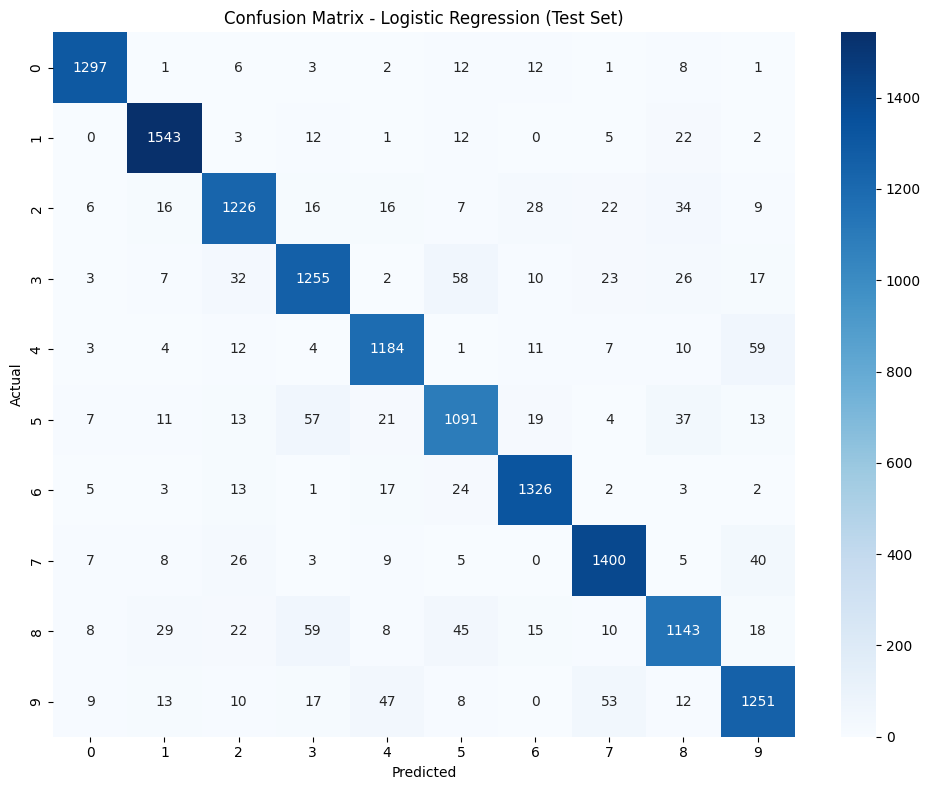

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

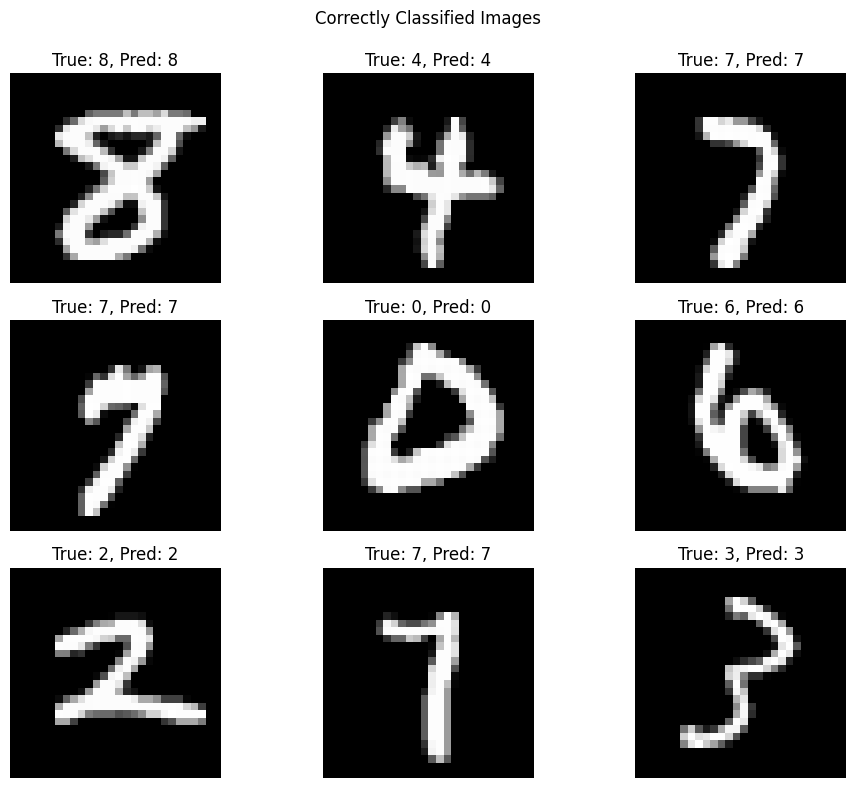

In [ ]:
#Correctly predicted samples
correct = np.array(y_pred) == np.array(y_test)
plt.figure(figsize=(10, 8))
for index, (image, true_label, pred_label) in enumerate(zip(X_test[correct].values, y_test[correct], y_pred[correct])):
    if index == 9:
        break
    image_reshaped = image.reshape(28, 28)
    plt.subplot(3, 3, index + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')

plt.suptitle('Correctly Classified Images')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

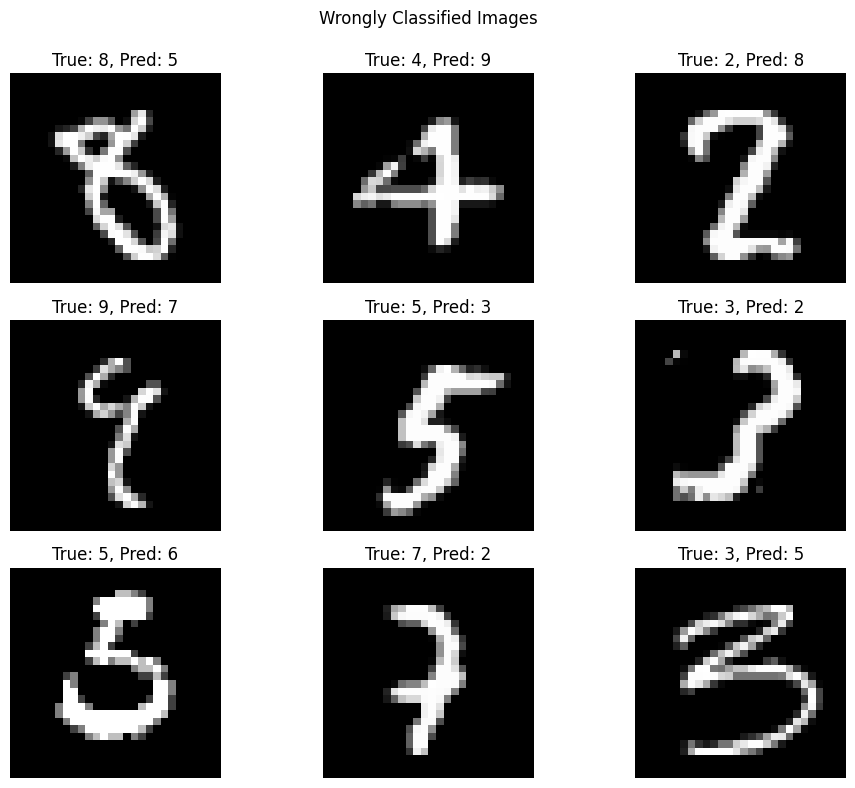

In [ ]:
#Incorrectly predicted samples
incorrect = np.array(y_pred) != np.array(y_test)
plt.figure(figsize=(10, 8))
for index, (image, true_label, pred_label) in enumerate(zip(X_test[incorrect].values, y_test[incorrect], y_pred[incorrect])):
    if index == 9:
        break
    image_reshaped = image.reshape(28, 28)
    plt.subplot(3, 3, index + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')

plt.suptitle('Wrongly Classified Images')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Logistic Regression without sklearn

In [ ]:
class Logistic_Regression:
    def __init__(self, iter = 1000, alpha = 0.1):
        self.iter = iter
        self.alpha = alpha
        self.w = None

    def fit(self, train_X, train_y):
        self.w = np.random.random((train_X.shape[1], train_y.shape[1]))
        train_y = train_y.toarray()
        # z= train_X  @ self.w
        # exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        # y_prob = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        # grad_w = (1/train_X.shape[0]) * train_X.T@(y_prob - train_y)

        for i in range(self.iter):
            z= train_X  @ self.w
            exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # it is done for avoiding from numerical unstabiltiy
            y_prob = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            grad_w = (1/train_X.shape[0]) * train_X.T@(y_prob - train_y)
            self.w = self.w - self.alpha*grad_w
        # return self.w

    def predict(self, test_X):
        z = test_X  @ self.w
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # z- np.max(z, axis=1, keepdims = True) is done for avoiding from numerical unstabiltiy and keeping the dimesnionality (n,1)
        y_prob = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        y_pred = np.argmax(y_prob, axis=1)
        return y_pred

In [ ]:
Logistic_Reg = Logistic_Regression(iter = 1500, alpha=1)
Logistic_Reg.fit(X_train_pca, train_y_one_hot)

In [ ]:
pred = Logistic_Reg.predict(X_test_pca)

In [ ]:
metrics = Metrics(y_test, pred)
metrics.Report()

,accuracy,recall,precision,F1 Score
Metrics,0.900786,0.899321,0.899919,0.89962


SVM showed best perfomance as it is able to handle complex data, using kernels(It helps the model to make non linear decision boundaries).

QDA had problems with high dimensionality as it needed to estimate covariance matrices for each class, and as there are too many features, covariance matrices can be singular(non invertible), so PCA was used on data to reduce the dimensionality, afer that the perfomance of the QDA became significantly better

Random Forest did not have problems with high dimensionality, it is resistant to dimensionality curse,(so PCA was not neccesary), as it does not do any parameter estimation, it is stable and gives good perfomance with 95% accuracy

Logistic Regression had problems with high dimensionality, as its decision boundaries are linear, and it is not able to handle the complexity of the data

Data Preprocessing Steps



1.   Imported the dataset
2.   Splitted the data into training (80%) and testing (20%)
3.   Since the pixel values in the MNIST images range from 0 to 255, normalized the data by dividing each pixel value by 255. This scaled the pixel values to a range of [0, 1]. This is done for the models which do parameter estimations(SVM, QDA, Logistic Regression)
4.     PCA was used to reduce the dimensionality, to make the perfomance of some models better(espacially for QDA)






How could we improve the perfomances of the models.

  For Logistic Regression we could use kernels, we could also manipulate with features to make them model non linear decision boundaries

  For QDA we could use rgularization to handle the problem with covariance matrix singularity

  For SVM and Random Forest we could do more detailed parameter tuning